In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#6ecadc","#e9a820","#e01563","#edb196","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]


# Graphing definition

In [43]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=-1):
    column_name =list(data_frame.columns )[begin_index:end_index]
    fig, ax = plt.subplots()
    x = np.arange(0, len(data_frame), step=1)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()

# Graphing Propogation

,V,K_I,Na_I,L_I
0,0.000000,4.955710e-07,-0.001126,-3.18000
1,0.318113,8.143670e-06,-0.009183,-3.08457
2,0.627487,4.226380e-05,-0.025860,-2.99175
3,0.929244,1.367080e-04,-0.049117,-2.90123
4,1.224260,3.410880e-04,-0.077067,-2.81272
...,...,...,...,...
97,-6.657580,4.102690e+00,-0.080088,-5.17727
98,-6.542110,4.071270e+00,-0.084447,-5.14263
99,-6.426530,4.040660e+00,-0.089014,-5.10796
100,-6.310900,4.010870e+00,-0.093795,-5.07327


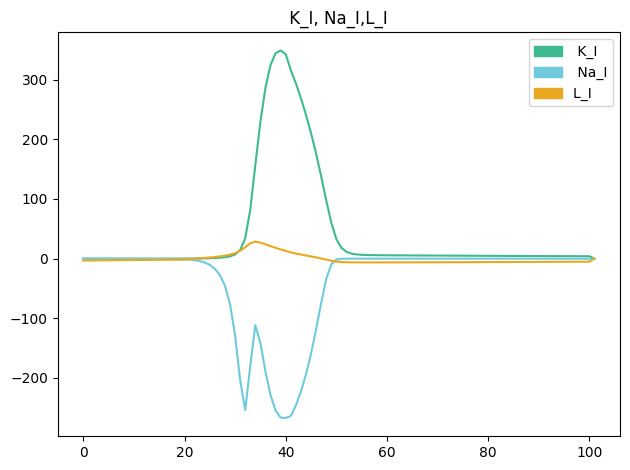

In [44]:
propogate_ap_df = pd.DataFrame(pd.read_csv("../data_files/propogate_output.csv"))
display(propogate_ap_df)
graph_df(propogate_ap_df,1,len(propogate_ap_df))

# Graph reduction

,V-0.5,V-0.2,V0.1,V0.4
0,-0.500000,-0.200000,0.100000,0.400000
1,0.075000,-0.054000,0.141000,0.498000
2,0.118828,0.011457,0.183354,0.620499
3,0.162416,0.060576,0.229664,0.765058
4,0.208766,0.103821,0.282816,0.909128
...,...,...,...,...
496,-0.010657,-0.018566,-0.004528,0.012205
497,-0.007123,-0.015033,-0.000992,0.015763
498,-0.003589,-0.011500,0.002547,0.019328
499,-0.000052,-0.007967,0.006090,0.022902


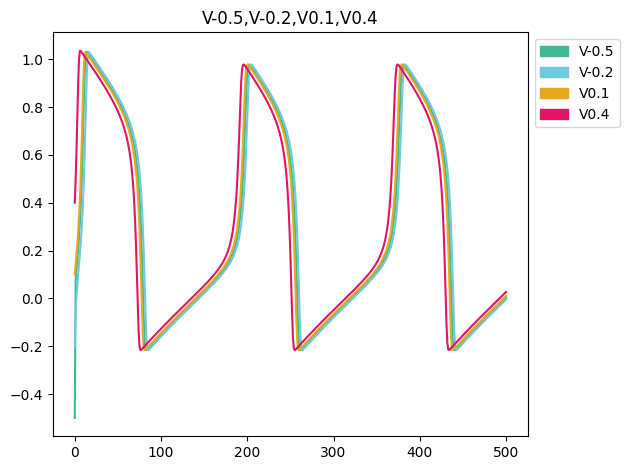

In [45]:
reduce_df = pd.DataFrame(pd.read_csv("../data_files/reduced_output.csv"))
display(reduce_df)
graph_df(reduce_df,end_index=len(reduce_df)+1)##if u want to graph the full graph u have to do this